In [1]:
import tensorflow as tf
import numpy as np
import edward as ed

%matplotlib inline

## 一些概率模型

http://edwardlib.org/api/model

* ed.models.RandomVariable: 一般随机变量
* ed.models.Bernoulli: 伯努利分布，01分布
* ed.models.BernoulliWithSigmoidProbs: 好像就是个自带sigmoid变换的伯努利分布，所以你可以直接传任意数进去不用01压缩化了
* ed.models.Beta Beta分布
* ed.models.BetaWithSoftplusConcentration beta分布，但两个参数在前面加了个softplus变换，softplus是rectifier max(0,x)函数的平滑，取为ln(1+e^x)。如此也不用手段压缩了。
* ed.models.Binomial 二项分布
* ed.models.Categorical 离散分布,或者说多项分布只分配一次的特殊情况。可以用prob或logit定概率向量
* ed.models.Chi2 卡方分布
* ed.models.Chi2WithAbsDf 卡方分布，但是自由度参数前加了floor(abs(x))变换，所以也可以传任意实数了
* ed.models.ConditionalDistribution 内部可以有潜在变量的分布（？），抽象类
* ed.models.ConditionalTransformedDistribution 以上，可以带上变换了
* ed.models.Deterministic 退化随机变量，其概率仅集中在实轴上的一个点上
* ed.models.Dirichlet 狄利克雷分布，是多项分布的共轭先验分布，其每次抽样产生一个可以当多项分布参数的概率向量，也容易由多项分布的实现值进行更新。其参数alpha与输出的概率向量同维，若alpha在某个格上取值越大，则该格输出较大概率的概率也较大。alpha可以任意取值
* ed.models.DirichletMultinomial 狄利克雷分布-多项双层模型，类似于beta-二项双层模型。
* ed.models.DirichletProcess 狄利克雷过程，两个参数为常数alpha与分布H。
* ed.models.Empirical 貌似是用某种“样本”作为参数产生那种经验分布？
* ed.models.ExpRelaxedOneHotCategorical 类似RelaxedOneHotCategorical，但样本输出前加了个对数变换（对数正态分布是正态分布输出前加指数变换，指数放松OneHot分类分布是输出前加对数变换，没毛病）
* ed.models.Exponential 指数分布
* ed.models.ExponentialWithSoftplusRate 指数分布，但那个参数加了个SoftPlus变换（就是平滑max(0,x)那个）。所以参数可以随便填了
* ed.models.Gamma 伽马分布
* ed.models.GammaWithSoftplusConcentrationRate 伽马分布，但两个本来只能取整数的参数给加上了Softplus变换，所以可以随便取了
* ed.models.Geometric 几何分布（就是负二项分布那个特殊情况，第一次成功时的失败次数）
* ed.models.InverseGamma 逆gamma分布，如果一个随机变量服从gamma分布，则它的倒数服从逆gamma分布（但参数并不是一一对应的，第二个会倒过来）
* ed.models.InverseGammaWithSoftplusConcentrationRate 逆gamma分布，但参数加上softplus变换
* ed.models.Laplace 拉普拉斯分布,就是两个指数分布背靠背那个
* ed.models.LaplaceWithSoftplusScale 拉普拉斯分布，但尺度参数加上了softplus变换
* ed.models.Logistic 逻辑斯克分布,cdf是逻辑斯克函数的分布，很像正态分布。
* ed.models.Mixture 混合分布，即先根据离散分布从一个分布列表中选择一个分布，再从中生成样本（每生成一次选择一次，不是共享的）
* ed.models.Multinomial 多项分布
* ed.models.MultivariateNormalDiag 多元正态分布，但协方差矩阵只用方差向量生成，scale @ scale.T(注意这样生成的并不是对角矩阵)
* ed.models.MultivariateNormalDiagPlusLowRank 只用一个方差向量生成将导致矩阵只有1秩，这里加了几个其他参数，以稍微加秩增强参数能力
* ed.models.MultivariateNormalDiagWithSoftplusScale 类似MultivariateNormalDiag，在scale向量上加上了softplus变换
* ed.models.MultivariateNormalFullCovariance 经典的多元正态分布，那些近似主要是克服这里$n^2$参数爆炸的问题。
* ed.models.MultivariateNormalTriL 类似MultivariateNormalFullCovariance 但协方差矩阵式那个参数变为传一个下三角矩阵进去（原协方差矩阵的closky分解）
* ed.models.NegativeBinomial 负二项分布
* ed.models.Normal 正态分布
* ed.models.NormalWithSoftplusScale 正态分布，scale参数加上了softplus变换
* ed.models.OneHotCategorical 类似Categorical,不过0在这里表示为[1,0,0]，1在这里表示为[0,1,0]之类的。
* ed.models.ParamMixture 类似混合分布，但现在换成传入一个抽象分布与参数列表了
* ed.models.PointMass 类似于经验分布函数，但只有一个“样本”参数
* ed.models.Poisson 泊松分布
* ed.models.QuantizedDistribution 把左开右闭区间映射为右边那个数，参数为最小值为最大值，参数每写清楚，需要用时查源代码
* ed.models.RelaxedBernoulli 类似RelaxedOneHotCategorical，但只有两个格
* ed.models.RelaxedOneHotCategorical 类似OneHotCategorical，但只能输出0,1向量relax本来输出1的格输出接近1的实数，接近0的格输出接近0的实数。,relax的程度由温度参数控制
* ed.models.StudentT t分布，除了自由度这里还可以直接设loc和scale
* ed.models.StudentTWithAbsDfSoftplusScale t分布，其中自由度做了floor(abs(x))变换，scale做了softplus变换
* ed.models.TransformedDistribution  合成一个变换分布，变换部分是个Bijector类，基础分布部分是个Distribution类
* ed.models.Uniform 均匀分布
* ed.models.VectorDeterministic 类似Deterministic，但是个向量
* ed.models.VectorLaplaceDiag 多元拉普拉斯分布，协方差矩阵由1秩的scale向量生成
* ed.models.WishartCholesky 类似WishartFull，但那个多元正态随机向量服从的协方差矩阵由一个下三角矩阵描述。
* ed.models.WishartFull 经典的wishart随机矩阵分布，如果上面那些scale是均值为0的多元正态分布，则它们生成的协方差矩阵就可以看做是从对应的自由度为1的wishart分布中抽出来的。

## 狄利克雷过程

狄利克雷分布是抽一个概率向量，可以当做多项分布的参数。而狄利克雷过程直接就是抽一个分布了，拥有两个参数逆散度$\alpha$与基础分布$H$。
其随机“过程”的解释是：

首先$\alpha$，$H$可以构造一个这么一个过程：$X_1$从$H$里抽一个值，之后$X_n$按之前实现值的频率为概率抽同样的值，不过也由有$\alpha$控制的抽一个新的值得概率，$\alpha$越高越倾向于抽新的值，不过最后将被抽已实现值的概率淹没。不过狄利克雷不是这个过程本身或其足够大时的分布，而是一个这样的分布的分布，当先从该分布抽一个分布，再从该分布独立同分布地抽出样本的样本的边缘分布与前面那个过程的边缘分布是一样。这是某个表示定理的结果。

其“狄利克雷”的解释为，我们先给出几个约束

* 1.先从狄利克雷过程这个分布的分布抽出分布G，再以G抽出样本X，X的边缘分布与H相同。
* 2.狄利克雷过程抽出的分布的“期望”，就是H，“波动性”则正比于$1/\alpha$

这大概给我们狄利克雷过程的意义一个大致的印象，而真正的形式定义是

$$
\begin{align}
& \text{If} \quad X \sim \mathrm{DP}(H,\alpha) \\
& \text{then} \quad X(B_1),\dots,X(B_n) \sim \mathrm{Dir}(\alpha H(B_1),\dots,\alpha H(B_n))
\end{align}
$$

其中$\mathrm{Dir}$是狄利克雷分布，而$B_1,\dots,B_n$是任意可测集的任意可测分划。

我们先有$H$与$\alpha$，然后给定$B_1,\dots,B_n$，这时第二个公式右边的分布已经确定了，那它左边那些$X(B_i)$是什么呢？
$X$作为从$\mathrm{DP}(H,\alpha)$中抽出来的分布（测度），和$H$一样对可测集$B_i$返回一个介于0,1的数，
也就是左边的随机向量所服从的分布（其随机性取决于从$\mathrm{DP}$里抽出来的$X$是什么样子的，每抽出一个$X$就生成一个确定和1向量）
正是右边的狄利克雷分布。

显然，这个性质等于在说，我们给出的$H$在所有离散划分上的体现（显然如果离散划分足够多，划得够细，则是对测度的良好逼近，类似简单积分）。
你$DP(H,\alpha)$的实现应至少应该围绕着我在此处的体现波动，无限个这样的约束的满足，就刻画了那个$\mathrm{DP}(H,\alpha)$。

这么看似乎$DP(H,\alpha)$是生成了一个围绕着$H$波动的分布。某种意义上说也没错，然而它产生的基本是几个（产生很多个的概率充分的小）
由$H$决定的采样点上的分布。虽然总体来看这几个采样点大致遵循原来的相对密度作为其概率，但单个一次实现可能相差甚远。

如此，狄利克雷过程的一个典型运用场景是聚类。在指定类数不知道的情况下（$\alpha$越大，相当于独立同分布抽样的时间越长，类数越多），$H$
相当于指定了类中心或参数的分布，然后各个类就按照那个“过程”自动产生了。。虽然参数化能力可能感人，就像星际那个例子用膨胀泊松分布一样。

In [2]:
with tf.Session() as sess:
    temperature = 0.5
    p = [0.1, 0.5, 0.4]
    dist = ed.models.RelaxedOneHotCategorical(temperature, probs=p)
    v = dist.sample()
    r = v.eval(session=sess)

In [3]:
r

array([  6.04602857e-04,   7.24271014e-02,   9.26968277e-01], dtype=float32)

In [4]:
with tf.Session() as sess:
    temperature = 0.5
    p = [0.1, 0.5, 0.4]
    dist = ed.models.ExpRelaxedOneHotCategorical(temperature, probs=p)
    v = dist.sample()
    r = v.eval(session=sess)

In [5]:
r

array([-3.91199255, -0.19279817, -1.86206794], dtype=float32)

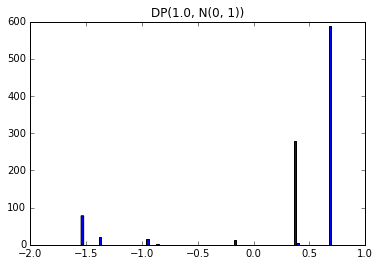

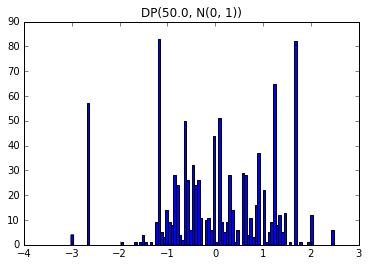

In [6]:
import matplotlib.pyplot as plt
from edward.models import DirichletProcess, Normal

def plot_dirichlet_process(alpha):
    with tf.Session() as sess:
        dp = DirichletProcess(alpha, Normal(0.0, 1.0))
        samples = sess.run(dp.sample(1000))
        #plt.hist(samples, bins=100, range=(-3.0, 3.0))
        plt.hist(samples, bins=100)
        plt.title("DP({0}, N(0, 1))".format(alpha))
        plt.show()
    return samples

# Dirichlet process with high concentration
s1 = plot_dirichlet_process(1.0)
# Dirichlet process with low concentration (more spread out)
s2 = plot_dirichlet_process(50.0)


In [7]:
s1.mean(),s1.std()

(0.34506091, 0.66949195)

In [8]:
s2.mean(),s2.std()

(0.008157284, 1.1547899)

$\mathscr{l},\mathscr{L}$